**Imports**

In [1]:
import matplotlib.pyplot as plt #For saving figures

import pandas as pd
import pydataset

import pyplotterlib.standard.plotters as ppl

**Create a multi plotter for later use**

In [2]:
_currKwargs = {"constrainedLayout":True, "figHeightPerRow":2, "figWidthPerCol":5, "nColsGrid":2}
RECT_MULTI_PLOTTER = ppl.RectMultiPlotter(**_currKwargs)

**Import and process the dataset**

In [3]:
DF = pydataset.data("iris")
DF.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa


In [4]:
setosaFrame = DF.loc[DF["Species"]=="setosa"].drop("Species",axis=1)
versicolorFrame = DF.loc[DF["Species"]=="versicolor"].drop("Species",axis=1)
virginicaFrame = DF.loc[DF["Species"]=="virginica"].drop("Species",axis=1)

virginicaFrame.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
101,6.3,3.3,6.0,2.5
102,5.8,2.7,5.1,1.9


**Create an initial box plot for a single property**

In [5]:
_currKwargs = {"boxColorsOn":True, "fontSizeDefault":12 , "gridLinesShowY":True,
               "groupLabels":["Setosa", "Versicolor", "Virginica"], "widthInterSpacing":0.1}
boxPlotterTempl = ppl.BoxPlotter(**_currKwargs)

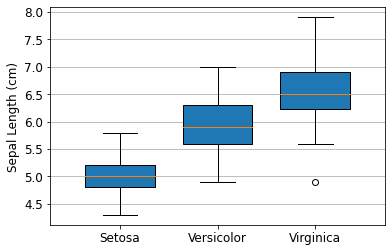

In [6]:
plotData = [ x["Sepal.Length"].to_numpy() for x in [setosaFrame, versicolorFrame, virginicaFrame] ]
firstPlotter = boxPlotterTempl.createFactory(plotDataSingleSeries=plotData, yLabelStr = "Sepal Length (cm)")
unused = firstPlotter.createPlot()

**Create a similar plot for *each* property**

In [7]:
boxPlotters = list()
for colName in setosaFrame.columns:
    currData = [x[colName].to_numpy() for x in [setosaFrame, versicolorFrame, virginicaFrame] ]
    titleStr = colName.replace(".", " ")
    _currKwargs = {"plotDataSingleSeries":currData, "titleStr":titleStr, "yLabelStr":titleStr + " (cm)"}
    currPlotter = boxPlotterTempl.createFactory(**_currKwargs)
    boxPlotters.append(currPlotter)

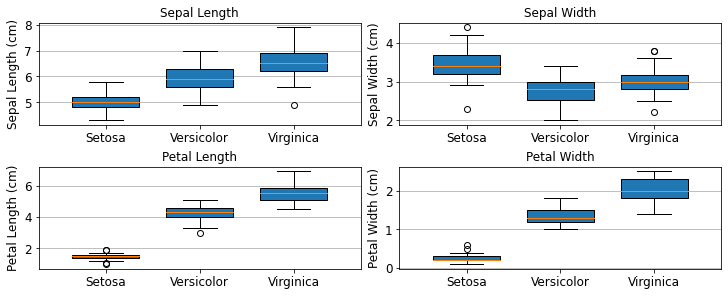

In [8]:
unused = RECT_MULTI_PLOTTER.createPlot(plotters=boxPlotters)

**Plot all together on a single plot**

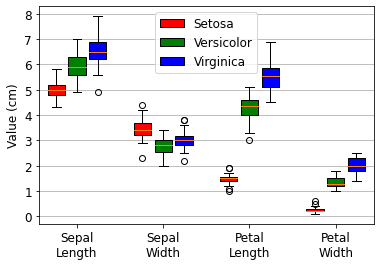

In [9]:
allData = list()
useFrames = [setosaFrame, versicolorFrame, virginicaFrame]
for frame in useFrames:
    currData = [frame[colName].to_numpy() for colName in frame.columns ]
    allData.append(currData)

_groupLabels = [x.replace(".","\n") for x in setosaFrame.columns]    
_currKwargs = {"boxColorStrsInterSeries":['r','g','b'], "dataLabels":["Setosa", "Versicolor", "Virginica"],
               "groupLabels": _groupLabels, "plotDataMultiSeries":allData,
               "showLegend":True, "yLabelStr":"Value (cm)",
               "widthInterSpacing":0.7}
allPlotter = boxPlotterTempl.createFactory(**_currKwargs)
unused = allPlotter.createPlot(**_currKwargs)

**Look at plotting boxes horizontally**

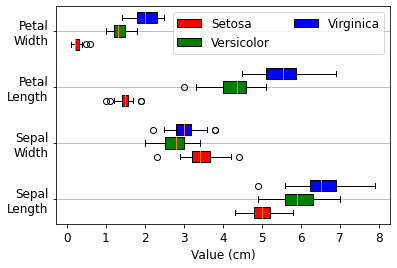

In [10]:
hozPlotter = allPlotter.createFactory(legendNumbCols=2,plotHorizontally=True, xLabelStr="Value (cm)", yLabelStr=None)
unused = hozPlotter.createPlot()

**Plot one data series per *property* rather than *species***

In [11]:
#
allData = list()
useFrames = [setosaFrame, versicolorFrame, virginicaFrame]
useCols = setosaFrame.columns
for col in useCols:
    currData = [ x[col] for x in useFrames ]
    allData.append(currData)


{'plotter': <pyplotterlib.standard.private.box_plotter.BoxPlotter at 0x7f9764befa00>}

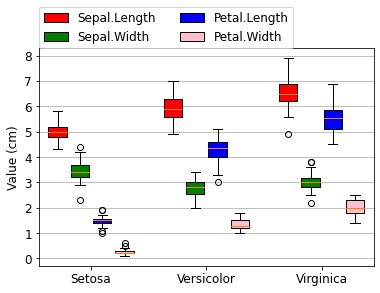

In [12]:
_currKwargs = {"boxColorStrsInterSeries":['r','g','b','pink'], "dataLabels":useCols,
               "groupLabels":["Setosa", "Versicolor", "Virginica"],
               "legendNumbCols":2, "legendFractPosStart":[0.0,1.0],
               "plotDataMultiSeries":allData}
byPropPlotter = allPlotter.createFactory(**_currKwargs)
byPropPlotter.createPlot(**_currKwargs)

**Combine a few plots from above and save**

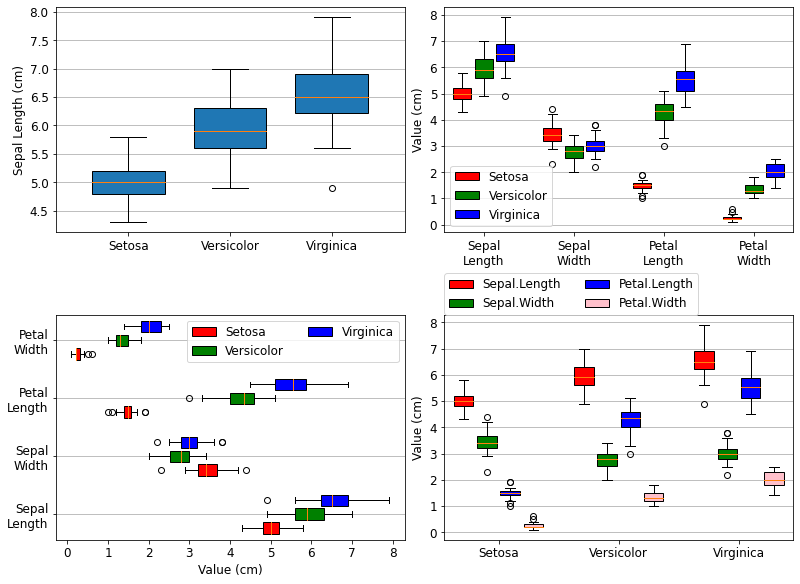

In [13]:
usePlotters = [firstPlotter, allPlotter, hozPlotter, byPropPlotter]
unused = RECT_MULTI_PLOTTER.createPlot(plotters=usePlotters, figHeightPerRow=4, figWidthPerCol=5.5)
plt.savefig("box_plotter_imgA.png")